In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

from utils import feedback, tf, marginsclosedloop, ControllerTuning, maxpeak
from utilsplot import step_response_plot, bodeclosedloop

In [3]:
s = tf([1, 0], 1)
G = 3*(-2*s + 1)/((10*s + 1)*(5*s + 1))

[Kc, Taui, Ku, Pu] = ControllerTuning(G, method='ZN')
print('Kc:', np.round(Ku/2.2, 3))
print('τi:', np.round(Pu/1.2, 3))
print('Ku:', np.round(Ku, 3))
print('Pu:', np.round(Pu, 3))

Kc: [1.136]
τi: [12.699]
Ku: [2.5]
Pu: [15.239]


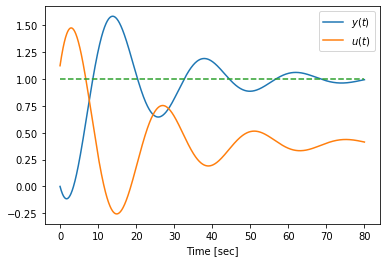

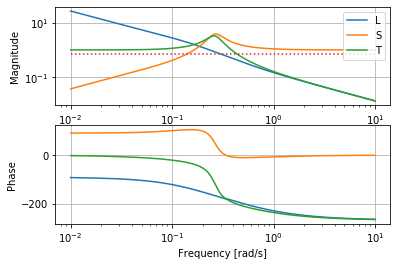

In [4]:
K1 = Kc*(1 + 1/(Taui*s))
K = K1[0]  # use this code to remove array
L = G * K
T = feedback(L, 1)
S = feedback(1, L)
u = S * K

plt.figure('Figure 2.8')
step_response_plot(T, u, 80, 0)
plt.show()

plt.figure('Figure 2.14')
bodeclosedloop(G, K, -2, 1, margin=True)
plt.show()

In [5]:
GM, PM, wc, wb, wbt, valid = marginsclosedloop(L)
Mt = maxpeak(T)
Ms = maxpeak(S)
print('GM: ', np.round(GM, 2))
print('PM: ', np.round(PM, 1), "deg or", np.round(PM / 180 * np.pi, 2), "rad")
print('wb: ', np.round(wb, 2))
print('wc: ', np.round(wc, 2))
print('wbt:', np.round(wbt, 2))
print('Ms: ', np.round(Ms, 2))
print('Mt: ', np.round(Mt, 2))

if valid:
    print("Frequency range wb < wc < wbt is valid")
else:
    print("Frequency range wb < wc < wbt is not valid")

GM:  [1.65]
PM:  [19.7] deg or [0.34] rad
wb:  [0.14]
wc:  [0.23]
wbt: [0.44]
Ms:  3.86
Mt:  3.09
Frequency range wb < wc < wbt is valid
